**DBSCAN** identifies clusters based on the density of points. It groups together points that are closely packed and marks points in low-density regions as outliers.<br>
The algorithm requires two parameters: **ϵ** (eps), the maximum distance between two points to be considered neighbors, and **min_samples**, the minimum number of points to form a dense region.

Key Features:

    Density-Based: Clusters are formed based on dense regions.
    Parameter Sensitivity: Requires specifying ϵϵ and min_samples.
    Efficiency: The time complexity is typically O(nlog⁡n), but it can degrade to O(n^2) in the worst case.
Advantages:

    Does not require specifying the number of clusters in advance.
    Can find arbitrarily shaped clusters.
    Robust to noise and can identify outliers.
    Suitable for clusters with varying densities.

Disadvantages:

    Performance can degrade with high-dimensional data.
    Sensitive to the choice of ϵ and min_samples.
    Struggles with varying density within a dataset.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import plotly.express as px
from sklearn.metrics import silhouette_score as ss
from sklearn.preprocessing import StandardScaler
from itertools import product, combinations

In [18]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


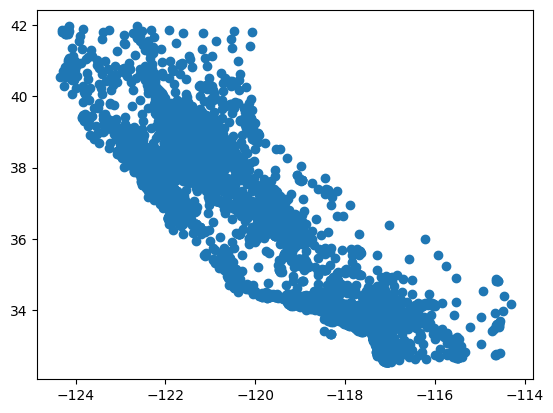

In [26]:
lat, longg = df.latitude , df.longitude
plt.scatter(longg, lat)

In [27]:

lat_longg = np.array(list(zip(lat, longg)))
lat_longg

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

In [28]:
lat_longg2 = df[['latitude', 'longitude']]
X = lat_longg2.to_numpy()
X

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

In [36]:
dbscan_cluster_model = DBSCAN(eps = 0.2, min_samples = 50).fit(X)

In [37]:
df['cluster'] = dbscan_cluster_model.labels_
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,cluster
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0


In [38]:
df['cluster'].value_counts()

,count
cluster,
6,10911
0,6936
-1,875
2,871
5,257
8,256
9,111
3,109
4,93


In [39]:
fig = px.scatter(x = longg, y = lat, color = df['cluster'])
fig.show()

In [40]:
ss(X, df['cluster'])

0.3594210894085063

In [42]:
param_grid = {
    'eps': np.linspace(0.01, 1, num = 15),
    'min_samples': np.arange(2, 20, step = 3)
      }

In [44]:
param_grid_list = list(product(*param_grid.values()))
param_grid_list

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [55]:
def get_score_labels(param_grid_list, X):
  scores = []
  all_lables_list = []
  for index, (eps, min_samples) in enumerate(param_grid_list):
    dbscan_cluster_model = DBSCAN(eps = eps, min_samples = min_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_cluster = len(labels_set)
    if -1 in labels_set:
      num_cluster -= 1
    if num_cluster < 2 or num_cluster > 50:
      scores.append(-10)
      all_lables_list.append('bad')
      continue
    scores.append(ss(X, labels))
    all_lables_list.append(labels)
  best_index = np.argmax(scores)
  best_parameters = param_grid_list[best_index]
  best_labels = all_lables_list[best_index]
  best_score = scores[best_index]

  return {
      'best_epsilon': best_parameters[0],
      'best_min_samples': best_parameters[1],
      'best_labels': best_labels,
      'best_score': best_score
  }

best_dict = get_score_labels(param_grid_list, X)

In [57]:
best_dict

{'best_epsilon': 0.22214285714285714,
 'best_min_samples': 8,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': 0.32086158405428405}

In [58]:
df['cluster'] = best_dict['best_labels']
df['cluster'].value_counts()

,count
cluster,
4,11384
0,8670
-1,166
3,110
1,103
8,37
13,28
7,27
10,19


In [59]:
fig = px.scatter(x = longg, y = lat, color = df['cluster'])
fig.show()

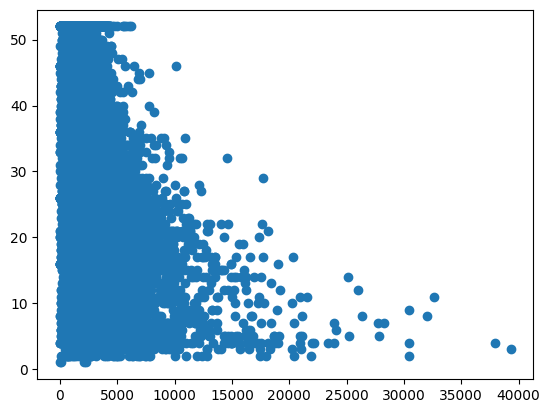

In [60]:
plt.scatter(df.total_rooms, df.housing_median_age)

In [61]:
X2 = df[['total_rooms', 'housing_median_age']].to_numpy()
X2

array([[ 880.,   41.],
       [7099.,   21.],
       [1467.,   52.],
       ...,
       [2254.,   17.],
       [1860.,   18.],
       [2785.,   16.]])

In [62]:
best_dict2 = get_score_labels(param_grid_list, X2)
best_dict2

{'best_epsilon': 1.0,
 'best_min_samples': 8,
 'best_labels': array([-1, -1, -1, ..., -1, -1, -1]),
 'best_score': -0.5233492128649596}

In [63]:
fig = px.scatter(x = X2[:,0], y = X2[:,1], color = best_dict2['best_labels'])
fig.show()

To ensure that the data is scaled properly for DBSCAN, we need to adjust the housing_median_age values using standard scaling techniques.

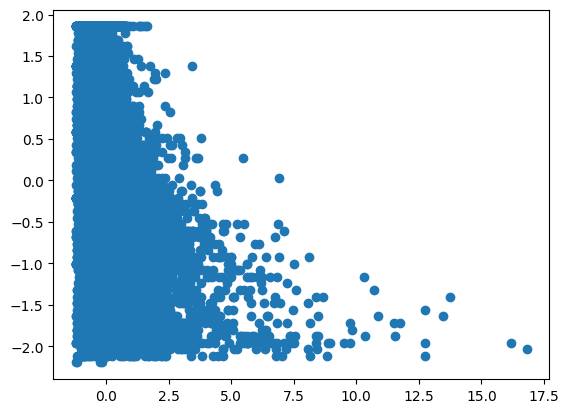

In [64]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
plt.scatter(X2_scaled[:,0], X2_scaled[:,1])

In [65]:
best_dict3 = get_score_labels(param_grid_list, X2_scaled)

In [66]:
best_dict3

{'best_epsilon': 1.0,
 'best_min_samples': 2,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': 0.8999444401810237}

In [67]:
fig = px.scatter(x = X2_scaled[:,0], y = X2_scaled[:,1], color = best_dict3['best_labels'])
fig.show()

In [18]:
import heapq
heap = []
heapq.heappush(heap, 10) # Pushes an item onto the heap, maintaining the heap invariant.
heapq.heappush(heap, 1)
heapq.heappush(heap, 5)
heapq.heappush(heap, 20)
heapq.heappush(heap, 3)
print(heap)

[1, 3, 5, 20, 10]


In [19]:
print(heapq.heappop(heap)) # Pops the smallest item from the heap, maintaining the heap invariant
print(heap)

1
[3, 10, 5, 20]


In [20]:
print(heapq.heappushpop(heap,200)) #Pushes an item on the heap and then pops and returns the smallest item from the heap
print(heap)

3
[5, 10, 200, 20]


In [22]:
print(heapq.heapreplace(heap, 4))    #Pops the smallest item from the heap and then pushes the new item.
heap

5


[4, 10, 200, 20]

In [24]:
lst = [5,7,9,1,3]
print(type(lst))
heapq.heapify(lst)    # Transforms a list into a heap, in-place, in linear time.
print(lst)
print(type(lst))


<class 'list'>
[1, 3, 9, 7, 5]
<class 'list'>


In [25]:
print(heapq.nlargest(2, lst))  # Returns the n largest elements from the dataset defined by iterable.
print(heapq.nsmallest(2, lst))  # Returns the n smallest elements from the dataset defined by iterable.


[9, 7]
[1, 3]


In [27]:
max_heap = []
heapq.heappush(max_heap, -10)
heapq.heappush(max_heap, -1)
heapq.heappush(max_heap, -5)
heapq.heappush(max_heap, -20)
heapq.heappush(max_heap, -3)
print(max_heap)
print([-i for i in max_heap])
print(-heapq.heappop(max_heap))
print([-i for i in max_heap])

[-20, -10, -5, -1, -3]
[20, 10, 5, 1, 3]
20
[10, 3, 5, 1]


In [28]:
sl1 = [1, 4, 7]
sl2 = [2, 5, 8]
sl3 = [3, 6, 9]

ml = list(heapq.merge(sl1, sl2, sl3))
ml

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
class PriorityQueue:
  def __init__(self):
    self.heap = []

  def push(self, item, priority):
    heapq.heappush(self.heap, (priority, item))

  def pop(self):
    return heapq.heappop(self.heap)

pq = PriorityQueue()
pq.push("task3", 2)
pq.push("task2", 1)
pq.push("task1", 3)

print(pq.pop())
print(pq.pop())
print(pq.pop())

(1, 'task2')
(2, 'task3')
(3, 'task1')


In [76]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function
c = np.array([9, -4])  # Note: we negate the coefficients to convert the problem to minimization

# Coefficients of the inequality constraints (left-hand side)
A = np.array([
    [-2, 1],  # -2x + y <= -4
    [3, -2]  # 3x - 2y <= 12 (we'll convert this to -4x + 5y <= 10)
])

# Right-hand side of the inequality constraints
b = np.array([-4, 12])

# Bounds for the decision variables
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub = A, b_ub = b, bounds = [x_bounds, y_bounds], method='highs')

# Output the results
if result.success:
    print(f"Optimal value of x: {result.x[0]}")
    print(f"Optimal value of y: {result.x[1]}")
    print(f"Maximum value of Z: {-result.fun}")
else:
    print("The problem does not have an optimal solution.")


Optimal value of x: 2.0
Optimal value of y: 0.0
Maximum value of Z: -18.0


In [69]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 49.2 MB/s eta 0:00:00


In [74]:
import pulp

# Define the problem
prob = pulp.LpProblem("Minimize Z", pulp.LpMinimize)

# Define decision variables
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=0, cat='Continuous')

# Define the objective function
prob += 9*x - 4*y, "Objective Function"

# Define the constraints
prob += -2*x + y <= -4, "Constraint 1"
prob += 3*x - 2*y <= 12, "Constraint 2"

# Solve the problem
prob.solve()

# Print the results
print(f"Status: {pulp.LpStatus[prob.status]}")
print(f"Optimal value of x: {pulp.value(x)}")
print(f"Optimal value of y: {pulp.value(y)}")
print(f"Maximum value of Z: {pulp.value(prob.objective)}")


Status: Optimal
Optimal value of x: 2.0
Optimal value of y: 0.0
Maximum value of Z: 18.0
